In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# train = np.load('physionet_2012_train.csv')
# test = np.load('physionet_2012_test.csv')
save_path = ''  # Set your path for sang files
read_path = ''
df = pd.read_csv(read_path + 'physionet_2012_train.csv', engine = 'python')
df_2 = pd.read_csv(read_path + 'physionet_2012_test.csv', engine = 'python')

In [13]:
df

,pid,timestamp,Weight,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,TroponinI,TroponinT,Urine,WBC,pH,Age,Gender,Height,ICUType,target
0,PS00000000,0.000000,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
1,PS00000000,1.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
2,PS00000000,2.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,NaN,NaN,41,0,NaN,4,0
3,PS00000000,3.350000,NaN,82.0,12.0,17.0,3.8,NaN,0.5,191.0,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
4,PS00000000,3.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574619,PS00007670,43.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55,0,NaN,3,0
574620,PS00007670,44.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,180.0,NaN,NaN,55,0,NaN,3,0
574621,PS00007670,44.916668,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,NaN,NaN,NaN,14.1,NaN,55,0,NaN,3,0
574622,PS00007670,45.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,110.0,NaN,NaN,55,0,NaN,3,0


In [14]:
type(df['timestamp'][0])

numpy.float64

### Sort the timestamp

In [15]:
df = df.sort_values(by=['pid', 'timestamp'])
df = df.reset_index(drop=True)

In [16]:
df

,pid,timestamp,Weight,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,TroponinI,TroponinT,Urine,WBC,pH,Age,Gender,Height,ICUType,target
0,PS00000000,0.000000,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
1,PS00000000,1.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
2,PS00000000,2.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,350.0,NaN,NaN,41,0,NaN,4,0
3,PS00000000,3.350000,NaN,82.0,12.0,17.0,3.8,NaN,0.5,191.0,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
4,PS00000000,3.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41,0,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574619,PS00007670,43.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55,0,NaN,3,0
574620,PS00007670,44.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,180.0,NaN,NaN,55,0,NaN,3,0
574621,PS00007670,44.916668,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,NaN,NaN,NaN,14.1,NaN,55,0,NaN,3,0
574622,PS00007670,45.666668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,110.0,NaN,NaN,55,0,NaN,3,0


### Organize data: patient by patient

In [17]:
###############  Organize data: patient by patient (time series): without patient ID ###############

import numpy as np

pserial = df.pid[0]
dfindex = 0
dataindex = 0
data = [[]]
tp_num = len(df.pid)
dfvalues = df.values
dfvalues = dfvalues.tolist()

for i in range(tp_num):
    #print("Organizing %d / %d patients"% (dfindex + 1, len(dfvalues)))
    if df.pid[dfindex] == pserial:
        #data[dataindex].append(dfvalues[dfindex][1:]) # if we don't need the serial number of patient
        data[dataindex].append(dfvalues[dfindex][0:])
    else :
        pserial = df.pid[dfindex]
        data.append([])
        dataindex += 1
        #data[dataindex].append(dfvalues[dfindex][1:]) # if we don't need the serial number of patient
        data[dataindex].append(dfvalues[dfindex][0:])

    dfindex += 1

In [18]:
df_2 = df_2.sort_values(by=['pid', 'timestamp'])
df_2 = df_2.reset_index(drop=True)

In [19]:
###############  Organize data: patient by patient (time series): without patient ID ###############

import numpy as np

pserial = df_2.pid[0]
dfindex = 0
dataindex = 0
data_2 = [[]]
tp_num = len(df_2.pid)
dfvalues = df_2.values
dfvalues = dfvalues.tolist()

for i in range(tp_num):
    #print("Organizing %d / %d patients"% (dfindex + 1, len(dfvalues)))
    if df_2.pid[dfindex] == pserial:
        #data[dataindex].append(dfvalues[dfindex][1:]) # if we don't need the serial number of patient
        data_2[dataindex].append(dfvalues[dfindex][0:])
    else :
        pserial = df_2.pid[dfindex]
        data_2.append([])
        dataindex += 1
        #data[dataindex].append(dfvalues[dfindex][1:]) # if we don't need the serial number of patient
        data_2[dataindex].append(dfvalues[dfindex][0:])

    dfindex += 1

In [20]:
data2 = []
patient_index = 0

for patient in data:
    #print('Constructing %d/%d input sequences' % (patient_index + 1, len(data)))

    data_tmp = []
    avl_flag = 0

    # search for the first cirrhosis date (if exist)
    for tp in patient:
        if tp[43] == 1: # [43] now is the target status
            base = tp[1]
            # print(base)
            avl_flag = 1
            break

    if avl_flag == 1 or avl_flag == 0:
        for tp in patient:
          if tp[1] >= 0 and tp[1] <= 12: # find tps before the index time 24hr
              tmp = tp
              #print(tmp[1])
              data_tmp.append(tmp[1:])
        data2.append(data_tmp)

    else: pass


    patient_index += 1

data = data2

In [21]:
data2_2 = []
patient_index = 0

for patient in data_2:
    #print('Constructing %d/%d input sequences' % (patient_index + 1, len(data_2)))

    data_tmp = []
    avl_flag = 0

    # search for the first cirrhosis date (if exist)
    for tp in patient:
        if tp[43] == 1: # [43] now is the target status
            base = tp[1]
            # print(base)
            avl_flag = 1
            break

    if avl_flag == 1 or avl_flag == 0:
        for tp in patient:
          if tp[1] >= 0 and tp[1] <= 12: # find tps before the index time 24hr
              tmp = tp
              #print(tmp[1])
              data_tmp.append(tmp[1:])
        data2_2.append(data_tmp)

    else: pass


    patient_index += 1

data_2 = data2_2

### mean mode

In [23]:
# calculate input feature mean of training set for imputation

cat_ft_num = 3
imputation = []

for findex in range(len(data[0][0])):   # len(data[0][0]) is the number of input features
    count = 0
    total = 0

    if findex >= (len(data[0][0]) - cat_ft_num): # the last 3 features are categorical, so we use most frequent value instead of mean for imputation
        temp1 = []
        for patient in data:
            for tp in patient:
                if np.isnan(tp[findex]) == False:
                    temp1.append(tp[findex])
        try:
            imputation.append(np.bincount(temp1).argmax())
        except:
            imputation.append(-1) # means no feasible imputation for this feature. You can cange "-1" to other special signals

    else:  # for non-categorical features, calculate the feature mean
        for patient in data:
            for tp in patient:
                if np.isnan(tp[findex]) == False:
                    total += tp[findex]
                    count += 1
        try:
            imputation.append(total/count)
        except:
            imputation.append(-1) # means no feasible imputation for this feature. You can cange "-1" to other special signals

# impute the training, validation, and testing set
pindex = 0
size = len(data)
for patient in data:
    #print('Imputing the training set : %d/%d'%(pindex + 1, size))
    tpindex = 0
    for tp in patient:
        for findex in range(len(data[0][0])):
            if np.isnan(data[pindex][tpindex][findex]) == True:
                data[pindex][tpindex][findex] = imputation[findex]
        tpindex += 1
    pindex += 1


In [24]:
# calculate input feature mean of training set for imputation

cat_ft_num = 3
imputation = []

for findex in range(len(data_2[0][0])):   # len(data[0][0]) is the number of input features
    count = 0
    total = 0

    if findex >= (len(data_2[0][0]) - cat_ft_num): # the last 3 features are categorical, so we use most frequent value instead of mean for imputation
        temp1 = []
        for patient in data_2:
            for tp in patient:
                if np.isnan(tp[findex]) == False:
                    temp1.append(tp[findex])
        try:
            imputation.append(np.bincount(temp1).argmax())
        except:
            imputation.append(-1) # means no feasible imputation for this feature. You can cange "-1" to other special signals

    else:  # for non-categorical features, calculate the feature mean
        for patient in data_2:
            for tp in patient:
                if np.isnan(tp[findex]) == False:
                    total += tp[findex]
                    count += 1
        try:
            imputation.append(total/count)
        except:
            imputation.append(-1) # means no feasible imputation for this feature. You can cange "-1" to other special signals

# impute the training, validation, and testing set
pindex = 0
size = len(data_2)
for patient in data_2:
    #print('Imputing the training set : %d/%d'%(pindex + 1, size))
    tpindex = 0
    for tp in patient:
        for findex in range(len(data_2[0][0])):
            if np.isnan(data_2[pindex][tpindex][findex]) == True:
                data_2[pindex][tpindex][findex] = imputation[findex]
        tpindex += 1
    pindex += 1


In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### zero padding

In [26]:
import tensorflow as tf

padded_data = tf.keras.preprocessing.sequence.pad_sequences(data, maxlen=12, dtype='float32')
padded_data_2 = tf.keras.preprocessing.sequence.pad_sequences(data_2, maxlen=12, dtype='float32')

In [27]:
np.shape(padded_data)


(7671, 12, 43)

In [28]:
np.shape(padded_data_2)

(2400, 12, 43)

### show the class distribution

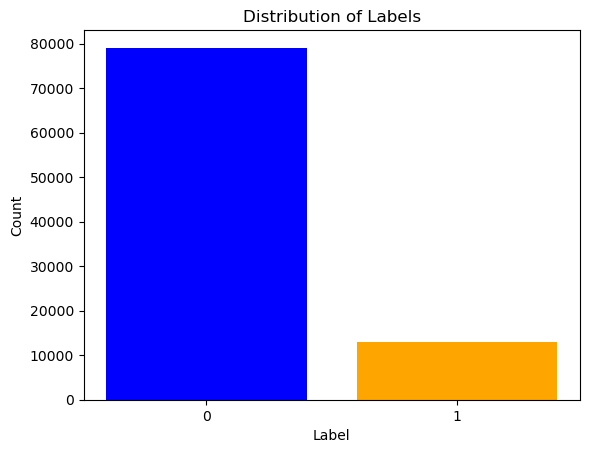

In [31]:
labels = padded_data[:, :, 42].astype(int)
flattened_labels = labels.flatten()
label_counts = np.bincount(flattened_labels)
plt.bar([0, 1], label_counts, color=['blue', 'orange'])
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


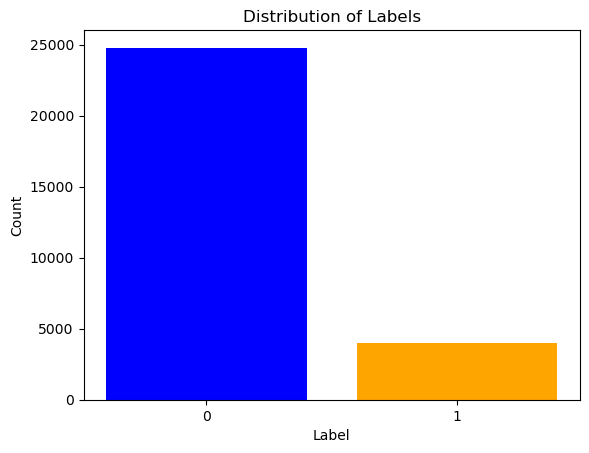

In [32]:
labels_2 = padded_data_2[:, :, 42].astype(int)
flattened_labels = labels_2.flatten()
label_counts = np.bincount(flattened_labels)
plt.bar([0, 1], label_counts, color=['blue', 'orange'])
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


### delete label

In [33]:
data_without_labels = np.delete(padded_data, 42, axis=2)
data_without_labels_2 = np.delete(padded_data_2, 42, axis=2)

In [34]:
print(data_without_labels.shape)
print(data_without_labels_2.shape)
print(labels.shape)
print(labels_2.shape)
labels = tf.expand_dims(labels, axis=2)
labels_2 = tf.expand_dims(labels_2, axis=2)
# print(labels.shape)
# print(labels_2.shape)

(7671, 12, 42)
(2400, 12, 42)
(7671, 12)
(2400, 12)


### start training

In [35]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [36]:
x_train = data_without_labels
y_train = labels
n_classes = len(np.unique(y_train))

### model architecture

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model

def transformer_encoder(inputs, num_heads, ff_dim, dropout=0.15):
    # Attention and Normalization
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    proj_input = LayerNormalization(epsilon=1e-6)(inputs + attention_output)
    # Feed Forward
    ff_output = Dense(ff_dim, activation="relu")(proj_input)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    # Output and Normalization
    encoder_output = LayerNormalization(epsilon=1e-6)(proj_input + ff_output)
    return Dropout(dropout)(encoder_output)

# Input
input_layer = Input(shape=(12, 42))

# Embedding
x = Dense(128, activation="relu")(input_layer)

# Adding Positional Encoding (implement or use a predefined function)

# Transformer Blocks
x = transformer_encoder(x, num_heads=4, ff_dim=4)
# Add more transformer_encoder layers as needed

# Output
output = Dense(1)(x)  # Adjust the activation function and dimensions as per your task

model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust optimizer and loss function as needed

# Model Summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 12, 42)]             0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 12, 128)              5504      ['input_2[0][0]']             
                                                                                                  
 multi_head_attention_1 (Mu  (None, 12, 128)              8368      ['dense_4[0][0]',             
 ltiHeadAttention)                                                   'dense_4[0][0]']             
                                                                                                  
 tf.__operators__.add_2 (TF  (None, 12, 128)              0         ['dense_4[0][0]',       

In [40]:
# Assuming x_train, y_train, x_test, y_test are already defined and properly preprocessed

# Define training parameters
epochs = 100  # Number of epochs to train for
batch_size = 64  # Batch size for training

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)




Epoch 1/100
96/96 [==============================] - 2s 8ms/step - loss: 0.3320 - val_loss: 0.1429
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1650 - val_loss: 0.1252
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1359 - val_loss: 0.1271
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1263 - val_loss: 0.1269
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1223 - val_loss: 0.1265
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1209 - val_loss: 0.1358
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.1203 - val_loss: 0.1239
Epoch 8/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1197 - val_loss: 0.1316
Epoch 9/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1194 - val_loss: 0.1233
Epoch 10/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1174 - val_loss: 0.1241
Epoch 11/

96/96 [==============================] - 1s 6ms/step - loss: 0.1106 - val_loss: 0.1210
Epoch 84/100
96/96 [==============================] - 1s 6ms/step - loss: 0.1105 - val_loss: 0.1248
Epoch 85/100
96/96 [==============================] - 1s 6ms/step - loss: 0.1109 - val_loss: 0.1215
Epoch 86/100
96/96 [==============================] - 1s 6ms/step - loss: 0.1113 - val_loss: 0.1211
Epoch 87/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1119 - val_loss: 0.1218
Epoch 88/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1111 - val_loss: 0.1228
Epoch 89/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1101 - val_loss: 0.1206
Epoch 90/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1105 - val_loss: 0.1209
Epoch 91/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1131 - val_loss: 0.1229
Epoch 92/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1109 - val_loss: 0.1215
Epoch 93/100


In [41]:
x_test = data_without_labels_2
y_test = labels_2

In [42]:
print(x_test.shape)
print(y_test.shape)

(2400, 12, 42)
(2400, 12, 1)


In [46]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")

75/75 [==============================] - 0s 2ms/step - loss: 0.1153
Test Loss: 0.11531419306993484


AUROC & AUPRC

In [47]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [48]:
y_pred = model.predict(x_test)  # Flatten the output

75/75 [==============================] - 0s 2ms/step


In [49]:
predictions_reshaped = np.array(y_pred).reshape(-1, 1).flatten()
true_labels_reshaped = np.array(y_test).reshape(-1, 1).flatten()

In [50]:
print(predictions_reshaped.shape)
print(true_labels_reshaped.shape)

(28800,)
(28800,)


In [51]:
auroc = roc_auc_score(true_labels_reshaped, predictions_reshaped)
print(f"Area Under the ROC: {auroc}")

Area Under the ROC: 0.7089550547272967


In [52]:
auprc = average_precision_score(true_labels_reshaped, predictions_reshaped)
print(f"Area Under the Precision-Recall Curve: {auprc}")

Area Under the Precision-Recall Curve: 0.3003258879318601
